# Metrics regression methods. The Naraday-Watson formula

- This formula performs the restoration of functional dependence on a local area of experimental data.

- ${a}(x) = \frac{\sum_{i=1}^n y_i \, K\!\left(\frac{\rho(x, x_i)}{h}\right)}{\sum_{i=1}^n K\!\left(\frac{\rho(x, x_i)}{h}\right)}$

- минимизирует функционал ошибки $Q(a,X) = \sum_{i=1}^{l} w_i(x) \cdot (a - y_i)^2$

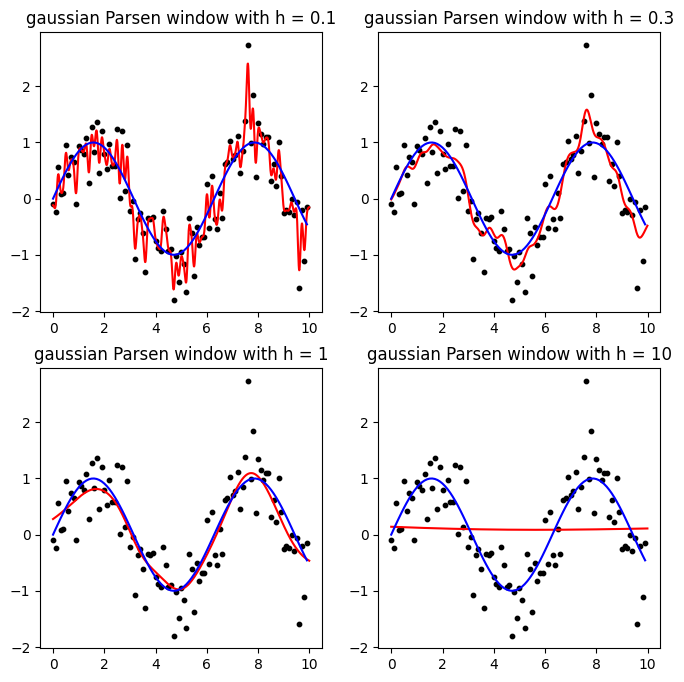

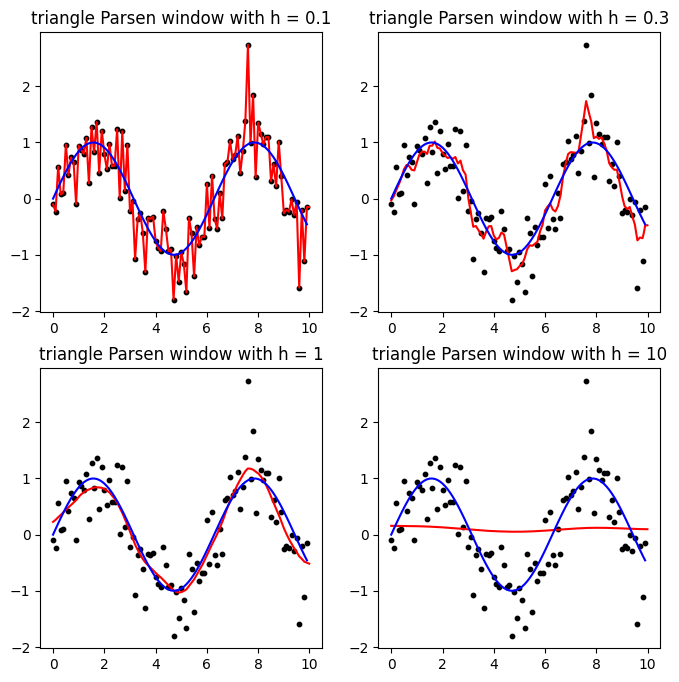

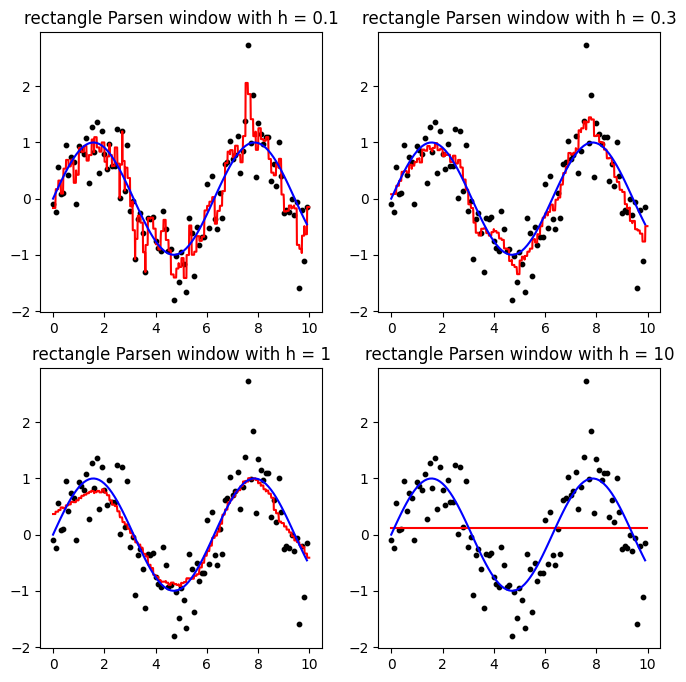

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.1) # original
x_est = np.arange(0, 10, 0.01) # function restoration
N = len(x)
y_sin = np.sin(x)
y = y_sin + np.random.normal(0, 0.5, N) # + noise = array for approximation

def K(r, win_type='gaussian'):
    
    if win_type == 'gaussian':
        return np.exp(-2 * r * r)
    elif win_type == 'triangle':
        return np.abs(1 - r) * bool(r <= 1)
    elif win_type == 'rectangle':
        return bool(r <= 1)
    

# metric
h = 1
r = lambda xx, xi: np.abs(xx - xi)
w = lambda xx, xi, h, wt: K(r(xx, xi) / h, wt) # weights



def plot_graphs(win_type='gaussian'):
    plt.figure(figsize=(8, 8))
    plot_number = 0 
    for h in [0.1, 0.3, 1, 10]:

        y_est = []
        for xx in x_est:
            ww = np.array([w(xx, xi, h, win_type) for xi in x])
            yy = np.dot(ww, y) / sum(ww) # The Naraday-Watson formula
            y_est.append(yy)

        plot_number += 1
        plt.subplot(2, 2, plot_number) # nrows, ncols, number

        plt.scatter(x, y, c='k', s=10)
        plt.plot(x_est, y_est, c='r')
        plt.plot(x, y_sin, c='b')
        plt.title(f'{win_type} Parsen window with h = {h}')

    
for var in ['gaussian', 'triangle', 'rectangle']:
    plot_graphs(var)

<img src=".././photo/c1.png" alt="photo" width="900" height="500">

In [18]:
import numpy as np

# координаты четырех точек
x = np.array([0, 1, 2, 3])
y = np.array([0.5, 0.8, 0.6, 0.2])

x_est = np.arange(0, 3.1, 0.1) # множество точек для промежуточного восстановления функции
h = 1
dist = lambda xx, xi: np.abs(xx - xi)
K = lambda xx, xi, h: np.abs(1 - dist(xx, xi) / h) * bool(np.abs(dist(xx, xi) / h) <= 1)

K_vec = []
for i in range(len(x_est)):
    curr = []
    for j in range(len(x)):
        curr.append(K(x[j], x_est[i], h))

    K_vec.append(curr)

y_est = [np.dot(y, np.array(K_vec[i])) / sum(K_vec[i]) for i in range(len(x_est))]



Restoring func

In [19]:
import numpy as np


def func(x):
    return 0.1 * x - np.cos(x/2) + 0.4 * np.sin(3*x) + 5


np.random.seed(0)

x = np.arange(-5.0, 5.0, 0.1) # значения по оси абсцисс [-5; 5] с шагом 0.1
y = func(x) + np.random.normal(0, 0.2, len(x)) # значения функции по оси ординат

h = 1/2
r = lambda xx, xi: np.abs(xx - xi)
K = lambda xx, xi, h: 1 / np.sqrt(2 * np.pi) * np.exp((-1) * (r(xx, xi) / h) ** 2 / 2)

K_vec = []
for i in range(len(x)):
    curr = []
    for j in range(len(x)):
        curr.append(K(x[i], x[j], h))

    K_vec.append(curr)

y_est = [np.dot(y, K_vec[i]) / sum(K_vec[i]) for i in range(len(x))]
Q = np.mean([(y_est[i] - y[i]) ** 2 for i in range(len(x))])
print(Q)

0.07226677375622803


Let we have following values rub/usd by each day:

In [ ]:
import numpy as np

rub_usd = np.array([75, 76, 79, 82, 85, 81, 83, 86, 87, 85, 83, 80, 77, 79, 78, 81, 84])
y = rub_usd.copy()
x = np.arange(1, len(rub_usd) + 1 + 10)
x_estimation = np.arange(len(rub_usd) + 1, len(rub_usd) + 11, 1) # default step == 1
# print(x_estimation, len(rub_usd))

h = 3
r = lambda xx, xi: np.abs(xx - xi)
K = lambda xx, xi, h: 1 / np.sqrt(2 * np.pi) * np.exp((-1) * (r(xx, xi) / h) ** 2 / 2)

predict = []
for i in range(len(x_estimation)):
    K_vec = []
    for j in range(len(x) - 10 + i): # 27 - 10 + 0 = 17th day, 18th day
        K_vec.append(K(x_estimation[i], x[j], h))
    
    prediction = np.dot(K_vec, y) / sum(K_vec)

    
    predict.append(prediction)
    y = np.append(y, prediction)


print(predict)

[18 19 20 21 22 23 24 25 26 27] 17
[80.81526358384305, 81.00609742642509, 81.12699379132953, 81.18358803950002, 81.20027875039781, 81.2001540444128, 81.19663891921441, 81.19445282860926, 81.19384631538183, 81.19393969127161]
